Newton's Law of Gravitation states the force between to objects:

\begin{equation}
    F = G\frac{m_1 \times m_2}{r^2}
\end{equation}

so we can create a vector field to visualize the law:

/var/folders/zq/t3cd4kk51s178z_n9xyb4wym0000gn/T/ipykernel_11480/724571079.py:12: RuntimeWarning: divide by zero encountered in true_divide
  Fx= -G*((S*E)/(np.sqrt(x**2+y**2)**2))*(x/(np.sqrt(x**2+y**2)))
/var/folders/zq/t3cd4kk51s178z_n9xyb4wym0000gn/T/ipykernel_11480/724571079.py:12: RuntimeWarning: invalid value encountered in true_divide
  Fx= -G*((S*E)/(np.sqrt(x**2+y**2)**2))*(x/(np.sqrt(x**2+y**2)))
/var/folders/zq/t3cd4kk51s178z_n9xyb4wym0000gn/T/ipykernel_11480/724571079.py:13: RuntimeWarning: divide by zero encountered in true_divide
  Fy= -G*((S*E)/(np.sqrt(x**2+y**2)**2))*(y/(np.sqrt(x**2+y**2)))
/var/folders/zq/t3cd4kk51s178z_n9xyb4wym0000gn/T/ipykernel_11480/724571079.py:13: RuntimeWarning: invalid value encountered in true_divide
  Fy= -G*((S*E)/(np.sqrt(x**2+y**2)**2))*(y/(np.sqrt(x**2+y**2)))


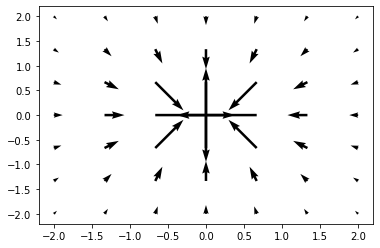

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

#We'll use astronomical units in order to reduce the size of our distances and masses.
x,y = np.meshgrid(np.linspace(-2,2,7),np.linspace(-2,2,7))
#gravitation constant
G=0.017
#mass of sun
S=1
#mass of earth
E=3.01e-6
Fx= -G*((S*E)/(np.sqrt(x**2+y**2)**2))*(x/(np.sqrt(x**2+y**2)))
Fy= -G*((S*E)/(np.sqrt(x**2+y**2)**2))*(y/(np.sqrt(x**2+y**2)))

VG=plt.quiver(x,y,Fx,Fy)
VG

We'll use the position Verlet method whic is a higher order method, to calculate the orbit because euler's methos isn't accurate enough.

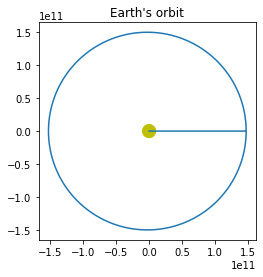

Earth's excentricity in the simulation is:  0.01797964422300881 which has an absolue error of:  0.0009796442230088076 and relative error of:  5.76 % from the real one


In [4]:

#International Units
G=6.67e-11
#mass of Sun and Earth
S=1.989e30
E=5.972e24
tf=365.25*24*3600 #one year time
dt=360  #step
n=tf/dt  #step
t = np.arange(0,tf+1,dt)#time array
t[1]=1 #initial time
# position in x and y arrays, we create a x2 matrix because in position verlet we have 1/2 values.
X=np.zeros((len(t))*2)
Y=np.zeros((len(t))*2)
X[1]=147100632000 #Earth's distance at perihelion;
Y[1]=0 #initial position y
# Velocity in x and y arrays
vx=np.zeros(len(t)+1)
vy=np.zeros(len(t)+1)
vx[1]=0 #initial condition x velocity
vy[1]=30300 #Earth's velocity at perihelion
radius = np.arange(0,tf,dt)
radius[0]=147105052000

for i in range(1,len(t)+1):
    try:
        X[2*i]=X[2*i-1]+vx[i]*0.5*dt
        Y[2*i]=Y[2*i-1]+vy[i]*0.5*dt
        vx[i+1]=vx[i]+(-G*((S*E)/(np.sqrt(X[2*i]**2+Y[2*i]**2)**2))*(X[2*i]/(np.sqrt(X[2*i]**2+Y[2*i]**2)))/E)*dt
        vy[i+1]=vy[i]+(-G*((S*E)/(np.sqrt(X[2*i]**2+Y[2*i]**2)**2))*(Y[2*i]/(np.sqrt(X[2*i]**2+Y[2*i]**2)))/E)*dt
        X[2*i+1]=X[2*i]+vx[i+1]*0.5*dt
        Y[2*i+1]=Y[2*i]+vy[i+1]*0.5*dt
        radius[i]=(np.sqrt(X[i]**2+Y[i]**2))
    except:
        continue
#we can draw a sun for visualization 
figure, axes = plt.subplots() 
cc = plt.Circle(( 0 , 0 ), 0.1e11,color='y' ) 
axes.set_aspect( 1 ) 
axes.add_artist( cc ) 
plt.title( "Earth's orbit" ) 
plt.plot(X,Y)
plt.show()
#let's calculate earth's orbit excentricity

a=max(radius)
b=min(radius)
e=(a-b)/(a+b)
#how does it compare to the real excentricity?
ereal=0.017
absoluteError=e-ereal
relativeErrorInPercentage=(absoluteError/ereal)*100
relativeError2decimals=float("{:.2f}".format(relativeErrorInPercentage))
print("Earth's excentricity in the simulation is: ",e, "which has an absolue error of: ", absoluteError ,"and relative error of: ", relativeError2decimals,"%" " from the real one")

It's possible to add other orbits, but they wouldn't be accurate cause we aren't taking the gravitational force between the planets into account, that's the famous n-body problem and a solution to it can be found in this same repository.

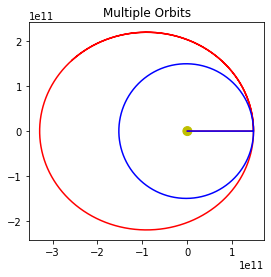

In [16]:
tf=365.25*24*9600 #add more time
dt=360  #step
n=tf/dt  #step
t = np.arange(0,tf+1,dt)#time array
t[1]=1 #initial time
# position in x and y arrays, we create a x2 matrix because in position verlet we have 1/2 values.
X2=np.zeros((len(t))*2)
Y2=np.zeros((len(t))*2)
X2[1]=147100632000 #Earth's distance at perihelion;
Y2[1]=0 #initial position y
# Velocity in x and y arrays
vx2=np.zeros(len(t)+1)
vy2=np.zeros(len(t)+1)
vx2[1]=0 #initial condition x velocity
vy2[1]=35300 #Earth's velocity at perihelion
radius2 = np.arange(0,tf,dt)
radius2[0]=147105052000

for i in range(1,len(t)+1):
    try:
        X2[2*i]=X2[2*i-1]+vx2[i]*0.5*dt
        Y2[2*i]=Y2[2*i-1]+vy2[i]*0.5*dt
        vx2[i+1]=vx2[i]+(-G*((S*E)/(np.sqrt(X2[2*i]**2+Y2[2*i]**2)**2))*(X2[2*i]/(np.sqrt(X2[2*i]**2+Y2[2*i]**2)))/E)*dt
        vy2[i+1]=vy2[i]+(-G*((S*E)/(np.sqrt(X2[2*i]**2+Y2[2*i]**2)**2))*(Y2[2*i]/(np.sqrt(X2[2*i]**2+Y2[2*i]**2)))/E)*dt
        X2[2*i+1]=X2[2*i]+vx2[i+1]*0.5*dt
        Y2[2*i+1]=Y2[2*i]+vy2[i+1]*0.5*dt
        radius2[i]=(np.sqrt(X2[i]**2+Y2[i]**2))
    except:
        continue
figure, axes = plt.subplots() 
cc = plt.Circle(( 0 , 0 ), 0.1e11,color='y' ) 
axes.set_aspect( 1 ) 
axes.add_artist( cc ) 
plt.title( "Multiple Orbits" ) 
plt.plot(X2,Y2,color='r')
plt.plot(X,Y,color='b')
plt.show()